# Introduction to Physics Informed Neural Networks (PINNs)

In this notebook we will outline the brief theory of Physics Informed Neural Networks (PINNs). Let's review a quick example of a problem where only sparse data is available. The below example shows a simple case of solving a 2nd order differential equation first using purely some data, then in a hybrid scenario with data and physics (or in other words learning bias) and finally using only the physical constraints.

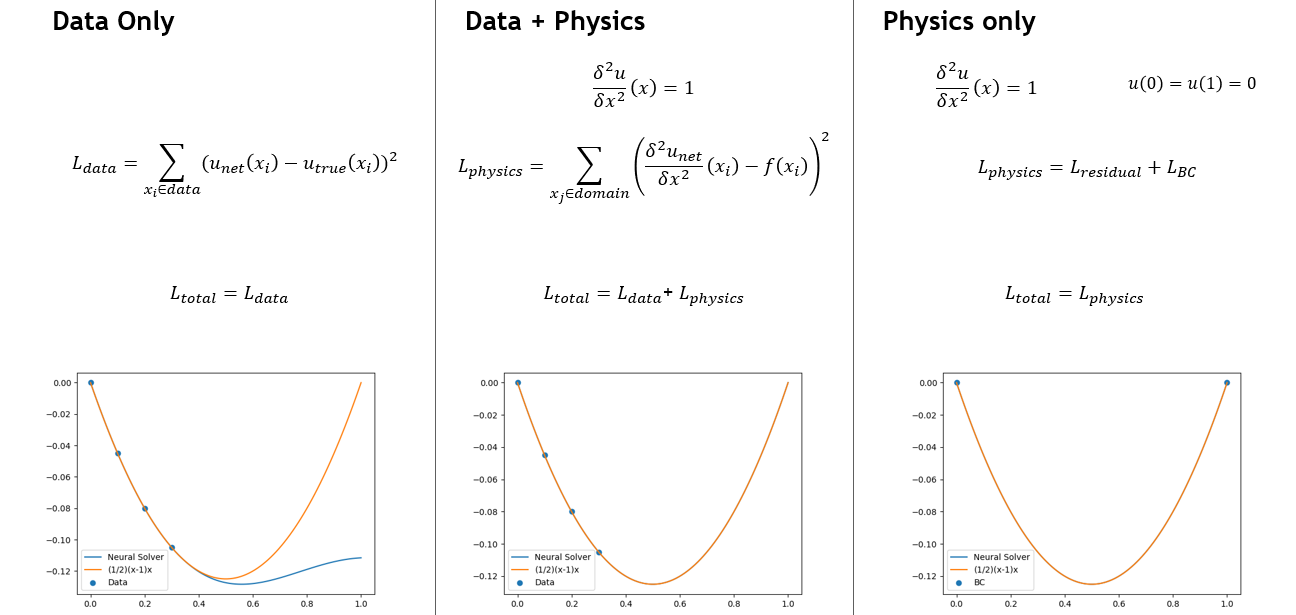

On the left we can observe that when provided with just data, the network is able to interpolate between those data points very well, but gives a very poor prediction when extrapolated. In other words, the model does not generalize very well to the solution. In the middle we can see that when the data is combined with a loss function that trains the network to satisfy a particular differential equation (soft constraint), it can improve how the neural network performs even outside the range of data it was provided (it generalizes better). Finally, we can see that an extension of this idea can be where we do not rely on any data, but only the differential equation and the boundary conditions to make the problem well posed. Then the neural network is able to solve the solution to this differential equation. In this final setting it behaves as a neural solver. 

Although these are simple examples to introduce the concept, these ideas can be extended to very complicated problems dealing with complex geometries, and problems governed by a variety of physics etc.

Now let's dive deeper into what it takes to formulate these different scenarios. Since the data-only paradigm is fairly common in machine learning/deep learning workflows (at least from a loss formulation standpoint - the loss functions are typically L2/L1 losses that try to minimize the difference between the network prediction and the true data), we will skip going into the details of data-driven training in this section and defer the discussion to the Fourier Neural Operators notebook later in the course. In this section, we will focus on how the loss for the physics constraints can be formulated using a neural network, how the gradients are computed (an important part for any differential equation), and how these concepts relate to the Modulus API and workflow. 

## Neural Network Solver Methodology (PINN)

In this section we provide a brief introduction to solving differential equations with neural networks. The idea is to use a neural network to approximate the solution to the given differential equation and boundary conditions. We train this neural network by constructing a loss function for how well the neural network is satisfying the differential equation and boundary conditions. If the network is able to minimize this loss function then it will in effect, solve the given differential equation.

To illustrate this idea we will give an example of solving the following problem:

\begin{equation} \label{1d_equation}
    \mathbf{P} : \left\{\begin{matrix}
\frac{\delta^2 u}{\delta x^2}(x) = f(x), \\ 
\\
u(0) = u(1) = 0,
\end{matrix}\right.
\end{equation}

We start by constructing a neural network $u_{net}(x)$. The input to this network is a single value $x \in \mathbb{R}$ and its output is also a single value $u_{net}(x) \in \mathbb{R}$. We suppose that this neural network is infinitely differentiable, $u_{net} \in C^{\infty}$. The typical neural network used is a deep fully connected network where the activation functions are infinitely differentiable. 

Next we need to construct a loss function to train this neural network. We easily encode the boundary conditions as a loss in the following way:

\begin{equation}
  L_{BC} = u_{net}(0)^2 + u_{net}(1)^2
\end{equation}

For encoding the equations, we need to compute the derivatives of $u_{net}$. Using automatic differentiation we can do so and compute $\frac{\delta^2 u_{net}}{\delta x^2}(x)$. This allows us to write a loss function of the form:

\begin{equation} \label{sumation_loss}
  L_{residual} = \frac{1}{N}\sum^{N}_{i=0} \left( \frac{\delta^2 u_{net}}{\delta x^2}(x_i) - f(x_i) \right)^2
\end{equation}

Where the $x_i$'s are a batch of points sampled in the interior, $x_i \in (0, 1)$. Our total loss is then $L = L_{BC} + L_{residual}$. Optimizers such as Adam are used to train this neural network. Given $f(x)=1$, the true solution is $\frac{1}{2}(x-1)x$. Upon solving the problem, you can obtain good agreement between the exact solution and the neural network solution as shown in the figure below.

<img src="single_parabola.png" alt="Drawing" style="width: 500px;"/>

## References

1. Kingma, Diederik P., and Jimmy partial. “Adam: A method for stochastic optimization.” arXiv preprint arXiv:1412.6980 (2014).
2. Raissi, Maziar, Paris Perdikaris, and George Em Karniadakis. “Physics informed deep learning (part i): Data-driven solutions of nonlinear partial differential equations.” arXiv preprint arXiv:1711.10561 (2017).


## Next

Now that you are familiar with the theory behind PINNs, let's begin our examination of how this is accomplished using Modulus.

Please continue to the [next notebook](Modulus_Anatomy.ipynb).